# Projet
## Probleme 1:
1- Dans ce probleme nous faisons face a un probleme de classification d'apprentissage supervise pour preduire la passation d'un etudiant dans un module donnnee. Neamoins dansnotre base de donnee nous avons 7 datasets qui sont cours_df, assessments_df, vle_df, studentInfo_df, studentRegistration_df, studentAssessment_df et studentVle_df. Dans la resolution de ce probleme nous allons nous focalise sur le dataset "studentInfo_df" qui contient les informations qui nous permettrons de preduire si un etudiant et subsetible de valide un module donne ou pas. En ulisant l'algorithme de décision (DecisionTreeClassifier)

## Formulation Mathématique
#### 
Les arbres de décision (DT) sont une méthode d'apprentissage supervisé non paramétrique utilisée pour la classification et la régression . L'objectif est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision simples déduites des caractéristiques des données. Un arbre peut être vu comme une approximation constante par morceaux.

Par exemple, dans l'exemple ci-dessous, les arbres de décision apprennent à partir des données pour approximer une courbe sinusoïdale avec un ensemble de règles de décision if-then-else. Plus l'arbre est profond, plus les règles de décision sont complexes et plus le modèle est adapté.

### Exploration de donnée

In [1]:
# Importation de librairie et bibliotheque
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Fonction permettant d'explorer les donnees
def data_info(df):
    print("HEAD:")
    print(df.head(3))
    print("\n")
    print("SHAPE:")
    print(df.shape)
    print("\n")
    print("INFO:")
    print(df.info())
    print("\n")
    print("DESCRIBE:")
    print(df.describe())
    print("\n")
    print("Les colonnes contenant des Nan :")
    print(df.isnull().sum())

Ce dataset cours_df contient la liste de tous les modules disponibles et leurs présentations.

La structure des présentations B et J peut différer et il est donc recommandé d'analyser les présentations B et J séparément. Néanmoins, pour certaines présentations, la présentation B/J précédente correspondante n'existe pas et, par conséquent, la présentation J doit être utilisée pour informer la présentation B ou vice versa. Dans le jeu de données, c'est le cas des modules CCC, EEE et GGG.

In [4]:
cours_df = pd.read_csv('C:/Users/user/Desktop/Doc Professionnel/ODC/PROJET/cours.csv')
#data_info(cours_df)

Ce fichier assements_df contient les résultats des évaluations des élèves. Si l'étudiant ne soumet pas l'évaluation, aucun résultat n'est enregistré. Les soumissions d'examen final sont manquantes.
Si le résultat des évaluations n'est pas stocké dans le système.

In [5]:
assessments_df = pd.read_csv('C:/Users/user/Desktop/Doc Professionnel/ODC/PROJET/assessments.csv')
#data_info(assessments_df)

Le fichier Vle contient des informations sur les interactions de chaque étudiant avec le matériel du VLE.

In [6]:
vle_df = pd.read_csv('C:/Users/user/Desktop/Doc Professionnel/ODC/PROJET/vle.csv')
#data_info(vle_df)

Ce fichier studentRegistration_df contient des informations sur l'heure à laquelle l'étudiant s'est inscrit à la présentation du module. Pour les étudiants qui se sont désinscrits, la date de désinscription est également enregistrée.

In [7]:
studentRegistration_df = pd.read_csv('C:/Users/user/Desktop/Doc Professionnel/ODC/PROJET/studentRegistration.csv')
#data_info(studentRegistration_df)

Ce fichier studentAssessment_df contient les résultats des évaluations des élèves. Si l'étudiant ne soumet pas l'évaluation, aucun résultat n'est enregistré. Les soumissions d'examen final sont manquantes, si le résultat des évaluations n'est pas stocké dans le système.

In [8]:
studentAssessment_df = pd.read_csv('C:/Users/user/Desktop/Doc Professionnel/ODC/PROJET/studentAssessment.csv')
#data_info(studentAssessment_df)

Le fichier studentVle.csv contient des informations sur les interactions de chaque étudiant avec le matériel du VLE

In [9]:
studentVle_df = pd.read_csv('C:/Users/user/Desktop/Doc Professionnel/ODC/PROJET/studentVle.csv')
#data_info(studentVle_df)

Ce fichier studentInfo_df contient des informations démographiques sur les étudiants ainsi que leurs résultats.

In [10]:
studentInfo_df = pd.read_csv('C:/Users/user/Desktop/Doc Professionnel/ODC/PROJET/studentInfo.csv')
exa = pd.read_csv('C:/Users/user/Desktop/Doc Professionnel/ODC/PROJET/studentInfo.csv')
data_info(studentInfo_df)

HEAD:
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  
2               60          Y    Withdrawn  


SHAPE:
(32593, 12)


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  -----

In [11]:
studentInfo_df.head(50)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass


In [12]:
studentInfo_df['region'].unique()

array(['East Anglian Region', 'Scotland', 'North Western Region',
       'South East Region', 'West Midlands Region', 'Wales',
       'North Region', 'South Region', 'Ireland', 'South West Region',
       'East Midlands Region', 'Yorkshire Region', 'London Region'],
      dtype=object)

In [13]:
studentInfo_df['highest_education'].unique()

array(['HE Qualification', 'A Level or Equivalent', 'Lower Than A Level',
       'Post Graduate Qualification', 'No Formal quals'], dtype=object)

In [14]:
studentInfo_df['final_result'].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [15]:
studentInfo_df['disability'].unique()

array(['N', 'Y'], dtype=object)

In [16]:
studentInfo_df['code_module'].unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [17]:
studentInfo_df['code_presentation'].unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [18]:
studentInfo_df['id_student'].nunique()

28785

<AxesSubplot:title={'center':"Taux par mention d'admission"}>

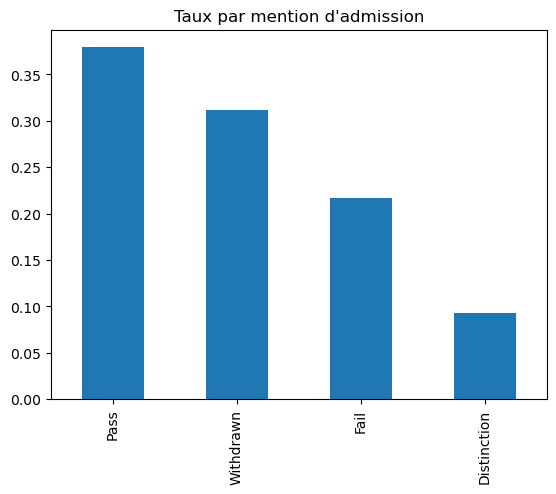

In [19]:
studentInfo_df['final_result'].value_counts(normalize=True).plot.bar(title="Taux par mention d'admission")

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

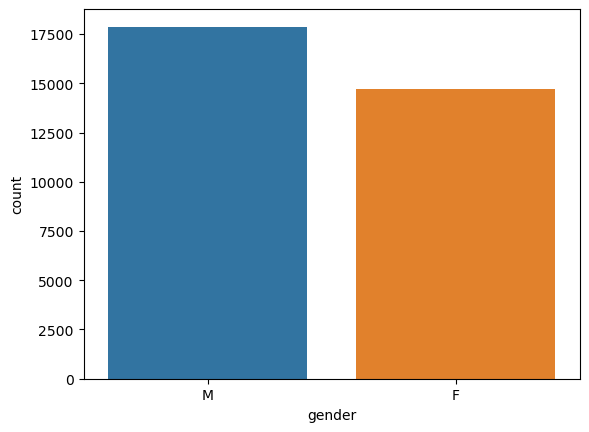

In [20]:
# Un appercis sur le genre des etudents
sns.countplot(studentInfo_df.gender)

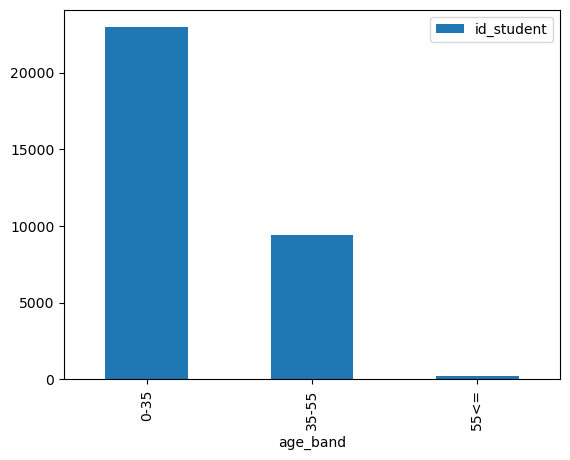

In [21]:
# Appercis par tranche d'age
studentInfo_df[['id_student', 'age_band']].groupby(by='age_band').count().plot.bar();

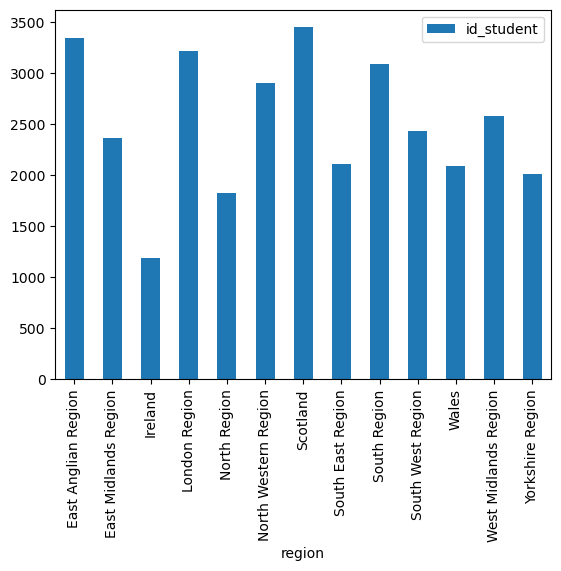

In [22]:
# Regroupement par age et par region des etudiants
studentInfo_df[['id_student', 'region']].groupby(by='region').count().plot.bar();

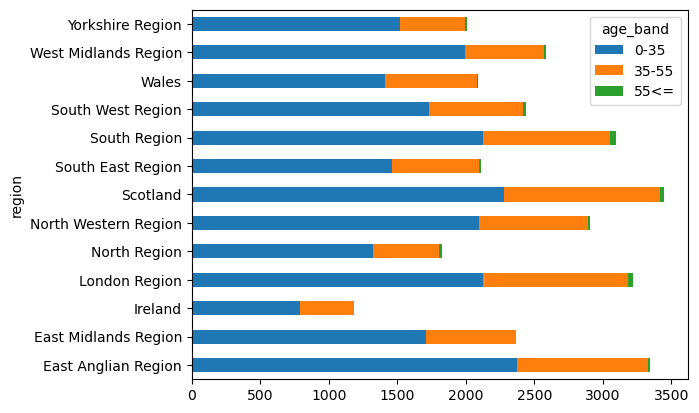

In [23]:
# Apparcis des trances d'age des etudiants par rapport a leur region
pd.crosstab(studentInfo_df.region, studentInfo_df.age_band).plot.barh(stacked = True);

# Pretraitement

In [24]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [25]:
#les variables categoriques
var_cat=['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'disability','final_result']
#les variables numeriques
var_num=['id_student', 'num_of_prev_attempts', 'studied_credits',]
print('les variables catégoriques: ', var_cat)
print('les variables numériques: ', var_num)

les variables catégoriques:  ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result']
les variables numériques:  ['id_student', 'num_of_prev_attempts', 'studied_credits']


In [26]:
# pour les variables categorigues, on les ramplace par leur mode
def variable_cat(studentInfo_df):
    global var_cat
    for data in studentInfo_df:
        if data in var_cat:
            #print(type(var_cat[data])) 
            studentInfo_df[data].fillna(studentInfo_df[data].mode()[0], inplace=True)
    return var_cat

In [27]:
df_cat = variable_cat(studentInfo_df)
df_cat

['code_module',
 'code_presentation',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'disability',
 'final_result']

In [28]:
# pour les variables numeriques, on les ramplaces par leur mediane
def variable_num(studentInfo_df):
    global var_num
    for data in studentInfo_df:
        if data in var_num :
            studentInfo_df[data].fillna(studentInfo_df[data].median(), inplace=True)
    return var_num

In [29]:
df_num = variable_num(studentInfo_df)
df_num

['id_student', 'num_of_prev_attempts', 'studied_credits']

In [30]:
studentInfo_df.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [31]:
data_cat = studentInfo_df[df_cat]
data_cat

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability,final_result
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,N,Pass
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,N,Pass
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,Y,Withdrawn
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,N,Pass
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,N,Pass
...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,N,Fail
32589,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,N,Distinction
32590,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,Y,Pass
32591,GGG,2014J,F,South East Region,Lower Than A Level,90-100%,35-55,N,Withdrawn


In [32]:
data_num = studentInfo_df[df_num]
data_num

,id_student,num_of_prev_attempts,studied_credits
0,11391,0,240
1,28400,0,60
2,30268,0,60
3,31604,0,60
4,32885,0,60
...,...,...,...
32588,2640965,0,30
32589,2645731,0,30
32590,2648187,0,30
32591,2679821,0,30


In [33]:
df = pd.concat([data_cat, data_num], axis=1)

In [34]:
data_cat = studentInfo_df[df_cat]
vacat = studentInfo_df[df_cat]
data_cat = df.drop(['code_presentation'], axis=1)


In [35]:
import category_encoders as ce
ce_OHE = ce.OneHotEncoder(cols=['code_module','gender','region','highest_education','imd_band','age_band','disability','final_result'])

data_cat = ce_OHE.fit_transform(vacat)

In [36]:
#encode = OneHotEncoder()
#data_cat = pd.DataFrame(encode.fit_transform(data_cat).toarray())
#data_cat.columns = encode.get_feature_names_out()
#data_cat

In [37]:
data_num = studentInfo_df[df_num]
data_num

,id_student,num_of_prev_attempts,studied_credits
0,11391,0,240
1,28400,0,60
2,30268,0,60
3,31604,0,60
4,32885,0,60
...,...,...,...
32588,2640965,0,30
32589,2645731,0,30
32590,2648187,0,30
32591,2679821,0,30


In [38]:
df = pd.concat([data_cat, data_num], axis=1)
df

,code_module_1,code_module_2,code_module_3,code_module_4,code_module_5,code_module_6,code_module_7,code_presentation,gender_1,gender_2,...,age_band_3,disability_1,disability_2,final_result_1,final_result_2,final_result_3,final_result_4,id_student,num_of_prev_attempts,studied_credits
0,1,0,0,0,0,0,0,2013J,1,0,...,0,1,0,1,0,0,0,11391,0,240
1,1,0,0,0,0,0,0,2013J,0,1,...,0,1,0,1,0,0,0,28400,0,60
2,1,0,0,0,0,0,0,2013J,0,1,...,0,0,1,0,1,0,0,30268,0,60
3,1,0,0,0,0,0,0,2013J,0,1,...,0,1,0,1,0,0,0,31604,0,60
4,1,0,0,0,0,0,0,2013J,0,1,...,1,1,0,1,0,0,0,32885,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,0,0,0,0,0,0,1,2014J,0,1,...,1,1,0,0,0,1,0,2640965,0,30
32589,0,0,0,0,0,0,1,2014J,0,1,...,0,1,0,0,0,0,1,2645731,0,30
32590,0,0,0,0,0,0,1,2014J,0,1,...,1,0,1,1,0,0,0,2648187,0,30
32591,0,0,0,0,0,0,1,2014J,0,1,...,0,1,0,0,1,0,0,2679821,0,30


In [39]:
#je veux definir ma target Y
y = df[['final_result_1','final_result_2','final_result_3','final_result_4']]
y

,final_result_1,final_result_2,final_result_3,final_result_4
0,1,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
32588,0,0,1,0
32589,0,0,0,1
32590,1,0,0,0
32591,0,1,0,0


In [40]:
# #je veux definir mes features x
X = df.drop(['final_result_1','final_result_2','final_result_3','final_result_4','id_student','code_presentation'], axis=1)
X

,code_module_1,code_module_2,code_module_3,code_module_4,code_module_5,code_module_6,code_module_7,gender_1,gender_2,region_1,...,imd_band_8,imd_band_9,imd_band_10,age_band_1,age_band_2,age_band_3,disability_1,disability_2,num_of_prev_attempts,studied_credits
0,1,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,240
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,60
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,60
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,60
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,30
32589,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,30
32590,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,30
32591,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,30


#### La taille des variables d'entrainements des x et des y

In [41]:
df.head(10)

,code_module_1,code_module_2,code_module_3,code_module_4,code_module_5,code_module_6,code_module_7,code_presentation,gender_1,gender_2,...,age_band_3,disability_1,disability_2,final_result_1,final_result_2,final_result_3,final_result_4,id_student,num_of_prev_attempts,studied_credits
0,1,0,0,0,0,0,0,2013J,1,0,...,0,1,0,1,0,0,0,11391,0,240
1,1,0,0,0,0,0,0,2013J,0,1,...,0,1,0,1,0,0,0,28400,0,60
2,1,0,0,0,0,0,0,2013J,0,1,...,0,0,1,0,1,0,0,30268,0,60
3,1,0,0,0,0,0,0,2013J,0,1,...,0,1,0,1,0,0,0,31604,0,60
4,1,0,0,0,0,0,0,2013J,0,1,...,1,1,0,1,0,0,0,32885,0,60
5,1,0,0,0,0,0,0,2013J,1,0,...,0,1,0,1,0,0,0,38053,0,60
6,1,0,0,0,0,0,0,2013J,1,0,...,1,1,0,1,0,0,0,45462,0,60
7,1,0,0,0,0,0,0,2013J,0,1,...,1,1,0,1,0,0,0,45642,0,120
8,1,0,0,0,0,0,0,2013J,0,1,...,1,1,0,1,0,0,0,52130,0,90
9,1,0,0,0,0,0,0,2013J,1,0,...,0,1,0,1,0,0,0,53025,0,60


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [43]:
len(X_train)

22815

In [44]:
X_train

,code_module_1,code_module_2,code_module_3,code_module_4,code_module_5,code_module_6,code_module_7,gender_1,gender_2,region_1,...,imd_band_8,imd_band_9,imd_band_10,age_band_1,age_band_2,age_band_3,disability_1,disability_2,num_of_prev_attempts,studied_credits
4166,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,60
26235,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,90
12392,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,120
20245,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,60
20005,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,60
19648,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,60
9845,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,90
10799,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,90


In [45]:
len(y_train)

22815

In [46]:
len(X_test)

9778

In [47]:
len(y_test)

9778

### Modele

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pickle
from sklearn.metrics import f1_score, precision_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [49]:
clf = DecisionTreeClassifier(max_depth = 50)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=50)

In [50]:
clf.score(X_test,y_test)

0.5782368582532215

### Modele de prediction

In [51]:
clf.predict(X_test[0:10])

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]], dtype=int64)

In [52]:
predclf = clf.predict(X_test)
predclf

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       ...,
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]], dtype=int64)

In [53]:
prédiction = clf.predict(X_test)
prédiction[:20]

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]], dtype=int64)

In [54]:
#verifions la performence de mon model
score = accuracy_score(y_test, predclf, normalize=True)
score

0.5782368582532215

In [55]:
f1Score = f1_score(y_test, predclf, average='micro')
f1Score

0.7031901001181519